importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading file

In [3]:
file="athlete_events.csv"
data=pd.read_csv(file)
df=pd.DataFrame(data)

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
 df=df.drop(columns=["ID"])

In [9]:
df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
events=df["Event"].unique()
len(df["Event"].unique())

765

In [11]:
for i in events:
    df['Height']= df['Height'].fillna(df.query(f"`Event` == \"{i}\"")['Height'].mean())
    df['Weight']= df['Weight'].fillna(df.query(f"`Event` == \"{i}\"")['Weight'].mean())
    



In [12]:
df['Age']= df['Age'].fillna(df['Age'].mean())  

In [13]:
df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,194.872624,91.683529,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,194.872624,91.683529,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
df=df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Sex     39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Games   39783 non-null  object 
 8   Year    39783 non-null  int64  
 9   Season  39783 non-null  object 
 10  City    39783 non-null  object 
 11  Sport   39783 non-null  object 
 12  Event   39783 non-null  object 
 13  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 4.6+ MB


plotting graphics


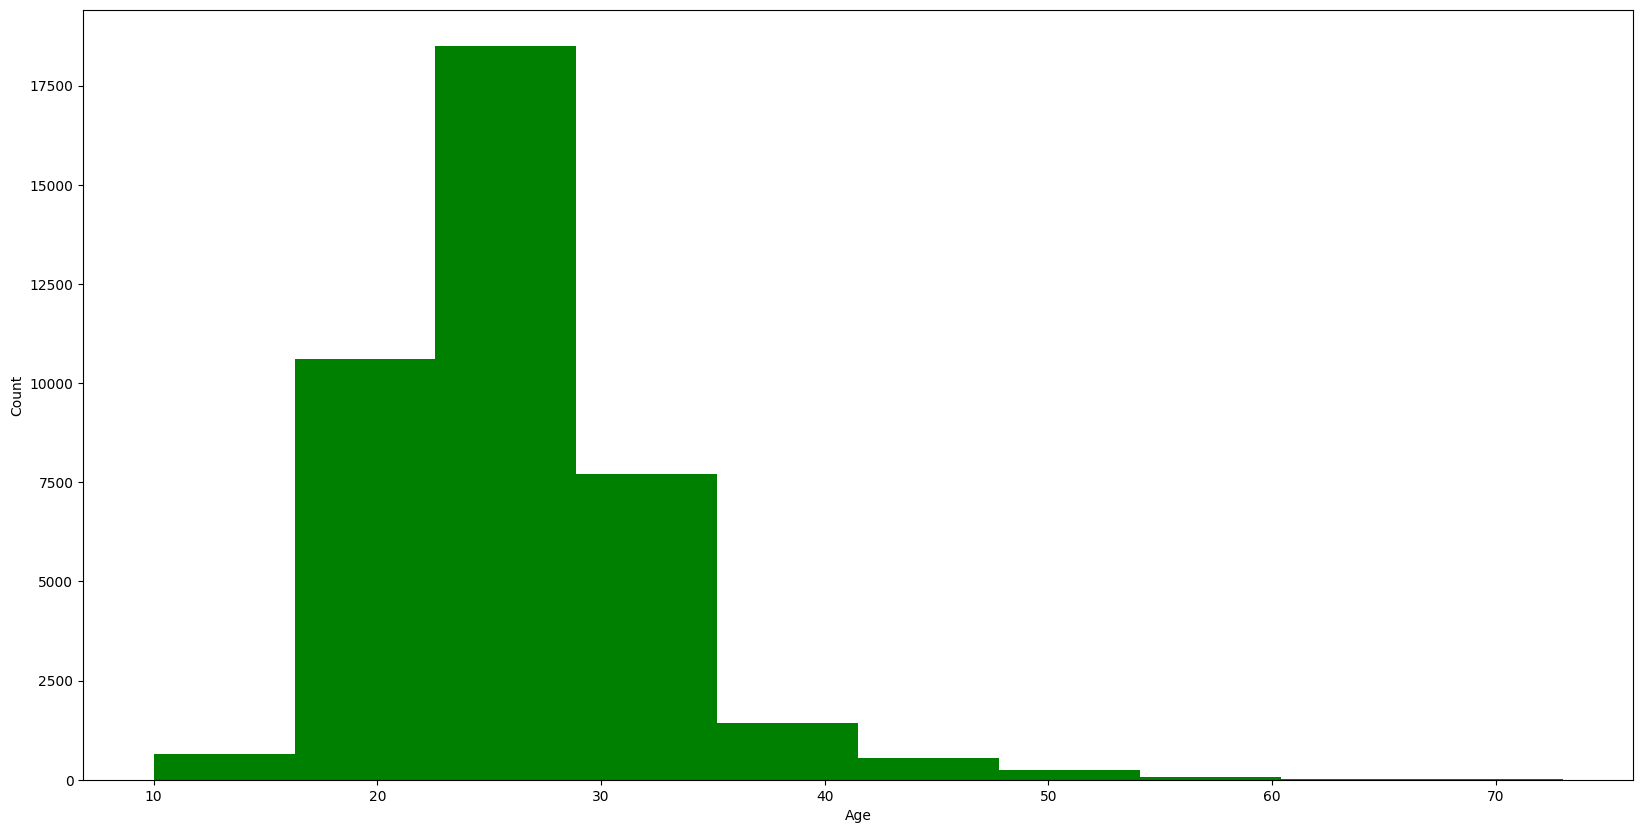

In [16]:
plt.figure(figsize=(20,10))
plt.hist(df["Age"],color="green")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

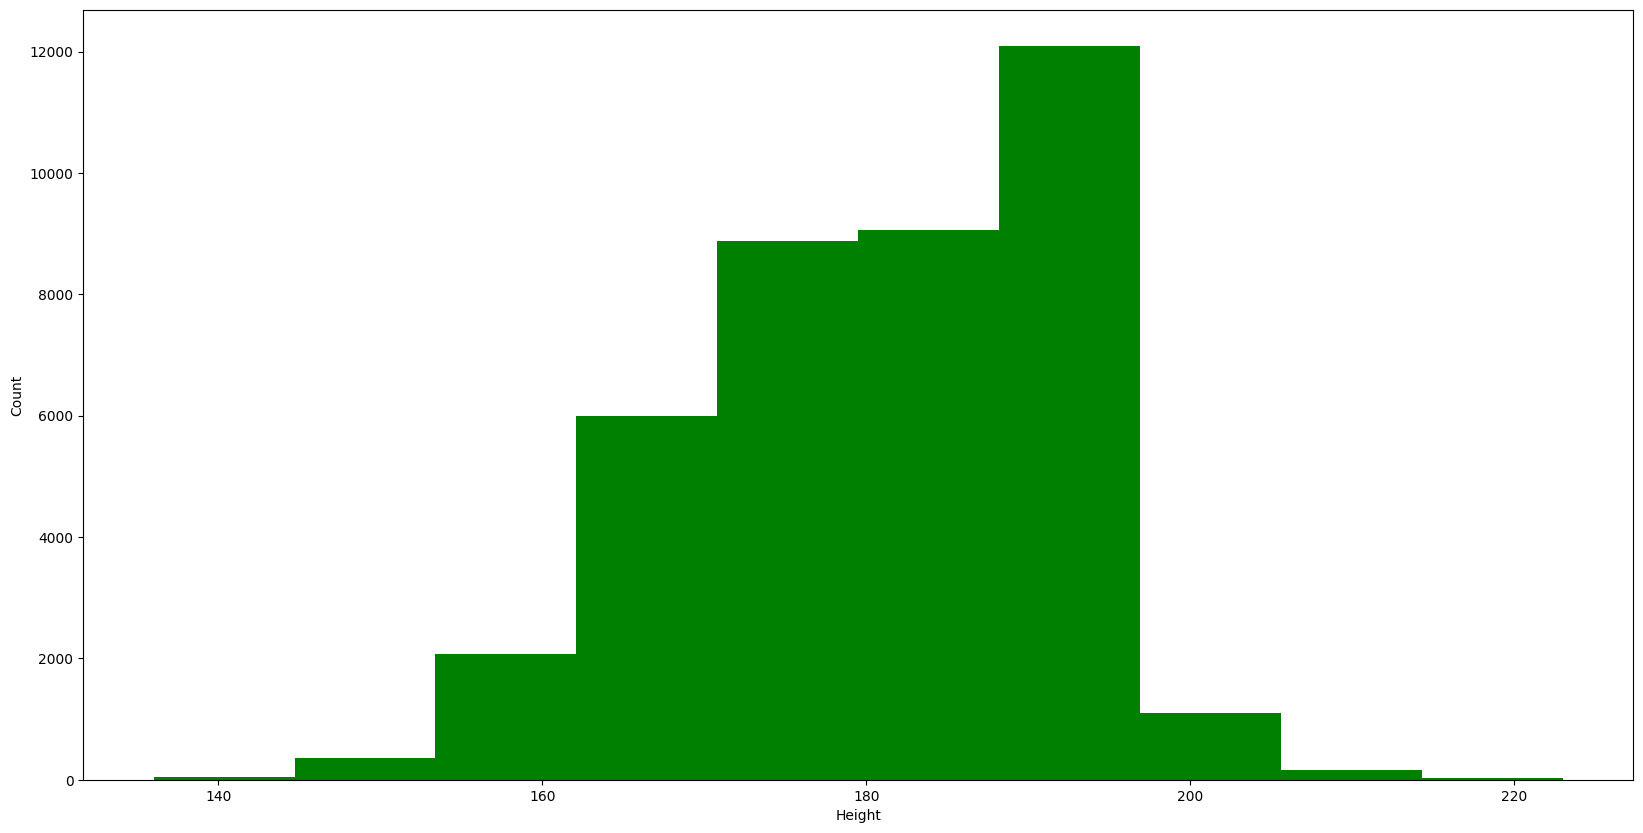

In [17]:
plt.figure(figsize=(20,10))
plt.hist(df["Height"],color="green")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

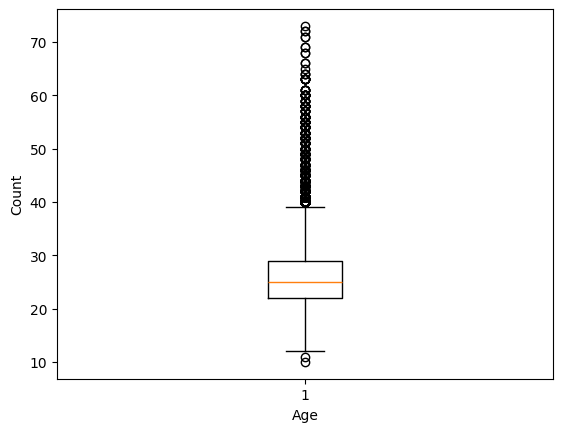

In [18]:
plt.boxplot(df['Age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

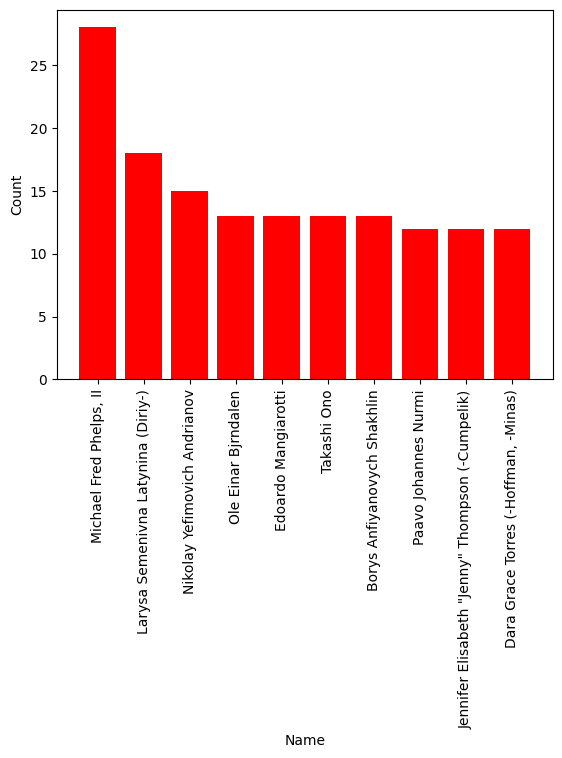

In [19]:
df_name=df['Name'].value_counts().head(10)
plt.bar(df_name.index,df_name.values,color='red')
plt.xticks(rotation=90)
plt.xlabel("Name")
plt.ylabel("Count")
plt.show()

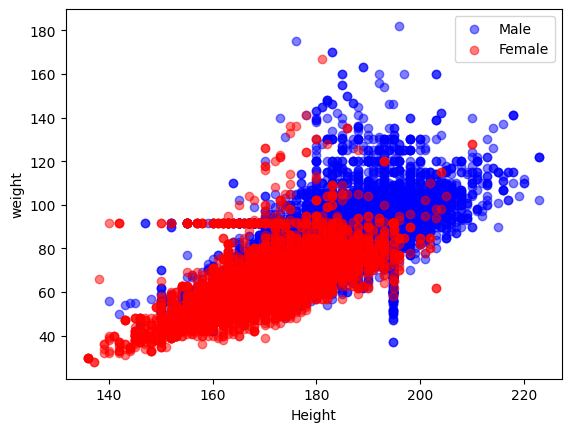

In [20]:
df_male=df[df["Sex"]=="M"]
df_female=df[df["Sex"]=="F"]
plt.scatter(df_male["Height"],df_male['Weight'],color="blue",label="Male",alpha=0.5)
plt.scatter(df_female["Height"],df_female["Weight"],color="red",label="Female",alpha=0.5)
plt.legend()
plt.xlabel("Height")
plt.ylabel("weight")
plt.show()


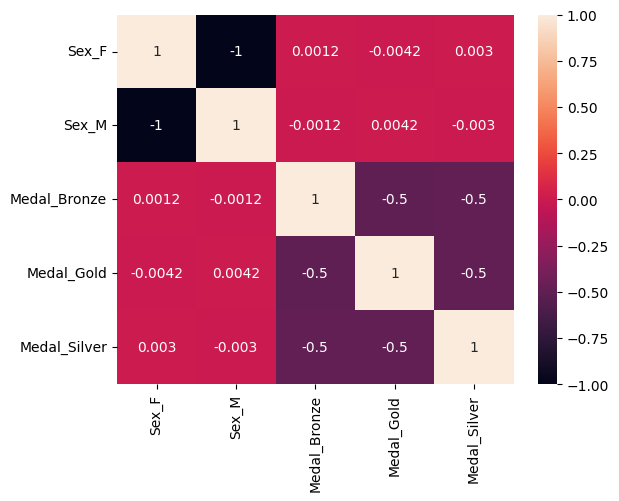

In [21]:
df_corr=pd.get_dummies(df,columns=['Sex','Medal'])
sns.heatmap(df_corr[['Sex_F',	'Sex_M',	'Medal_Bronze',	'Medal_Gold',	'Medal_Silver']].corr(),annot=True)
plt.show()

In [22]:
df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,194.872624,91.683529,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,194.872624,91.683529,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,194.872624,91.683529,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.000000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


pivot table

In [23]:
data_pivot=df.pivot_table(index='Sex',columns='Medal',values=['Age','Height','Weight'],aggfunc='mean')
data_pivot.head()

Age                            Height                          \
Medal     Bronze       Gold     Silver      Bronze        Gold      Silver   
Sex                                                                          
F      24.710542  24.373544  24.446678  171.931817  172.339343  172.195685   
M      26.332160  26.490364  26.600037  184.827912  185.058766  185.027874   

          Weight                        
Medal     Bronze       Gold     Silver  
Sex                                     
F      65.271053  65.798210  65.427262  
M      82.593213  83.117387  82.956576

finding outliers

In [24]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower_border = q1 - 1.5 * iqr
upper_border = q3 + 1.5 * iqr
outliers = df[(df['Age'] < lower_border) | (df['Age'] > upper_border)]

outlier=outliers.groupby("Sport")["Sport"].count().sort_values(ascending=False).head(5)
outlier

Sport
Equestrianism       286
Shooting            264
Sailing             201
Fencing             119
Art Competitions     84
Name: Sport, dtype: int64

In [ ]:
df['Year']=pd.to_datetime(df['Year'],format="%Y")
df.info()


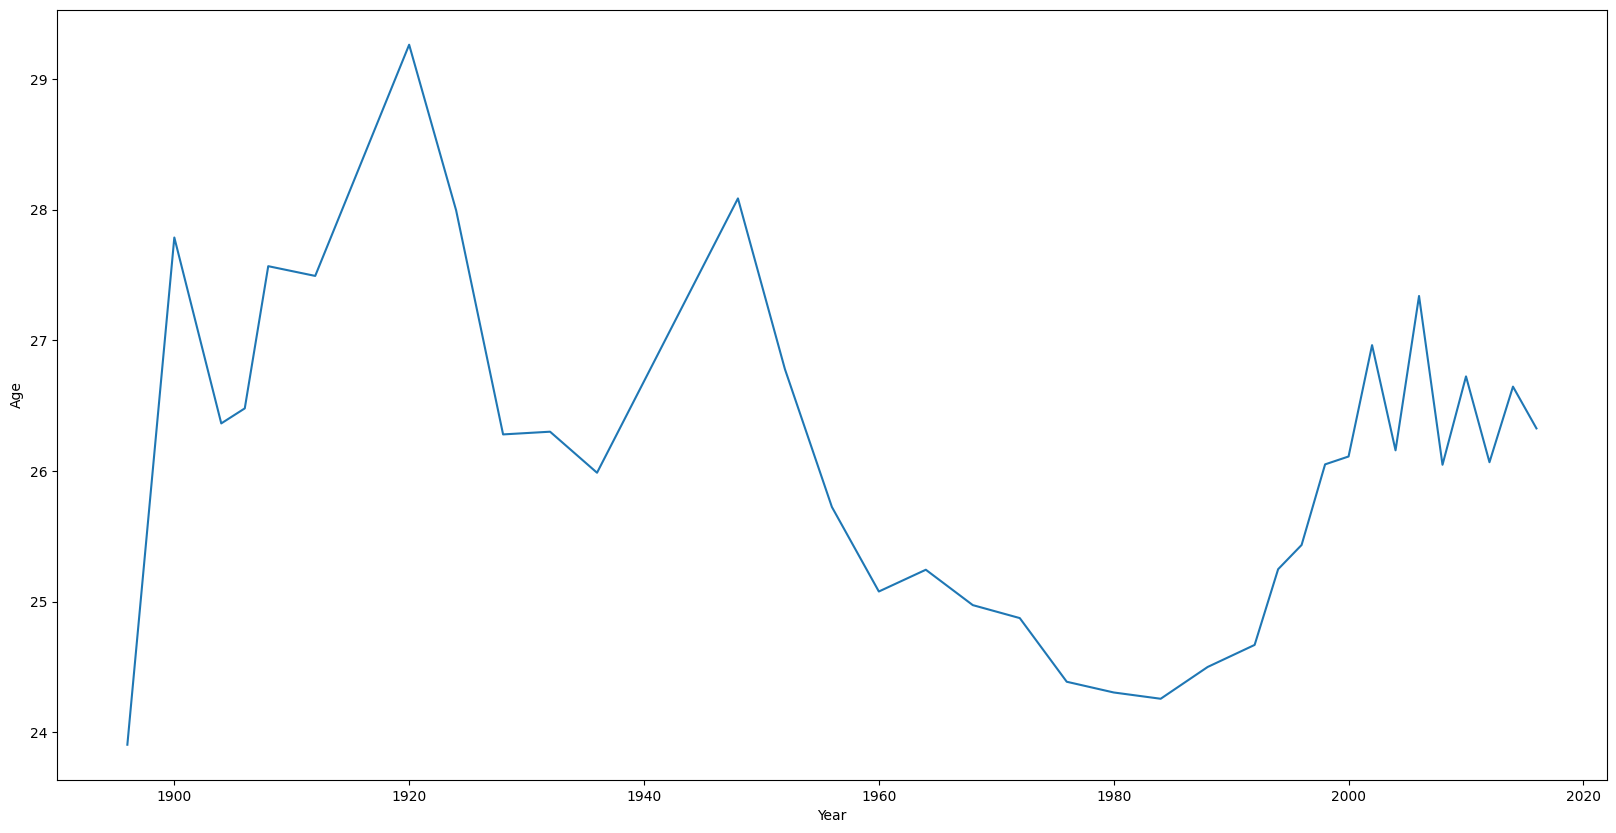

In [37]:
grouped_list=df.groupby(df['Year'])['Age'].mean()
plt.figure(figsize=(20,10))
plt.plot(grouped_list)
plt.xlabel("Year")
plt.ylabel("Age")
plt.show()
